### **PREDICCIÓN MILLAS POR GALÓN**

### **Limpieza & Análisis de Datos**

In [ ]:
import pandas as pd
df = pd.read_csv('./auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
datos = df.dropna()

In [ ]:
datos['car name'].value_counts()

,count
car name,
ford pinto,6
toyota corolla,5
amc matador,5
ford maverick,5
chevrolet chevette,4
...,...
chevrolet monza 2+2,1
ford mustang ii,1
pontiac astro,1


In [ ]:
datos.drop('car name', axis=1, inplace=True)

In [ ]:
datos

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [ ]:
datos[datos == "?"].count()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0


In [ ]:
datos = datos[datos['horsepower'] != '?']
datos['horsepower'] = datos['horsepower'].astype(float)

<ipython-input-3631-09f46af614e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['horsepower'] = datos['horsepower'].astype(float)


In [ ]:
datos

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [ ]:
datos.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<Axes: >

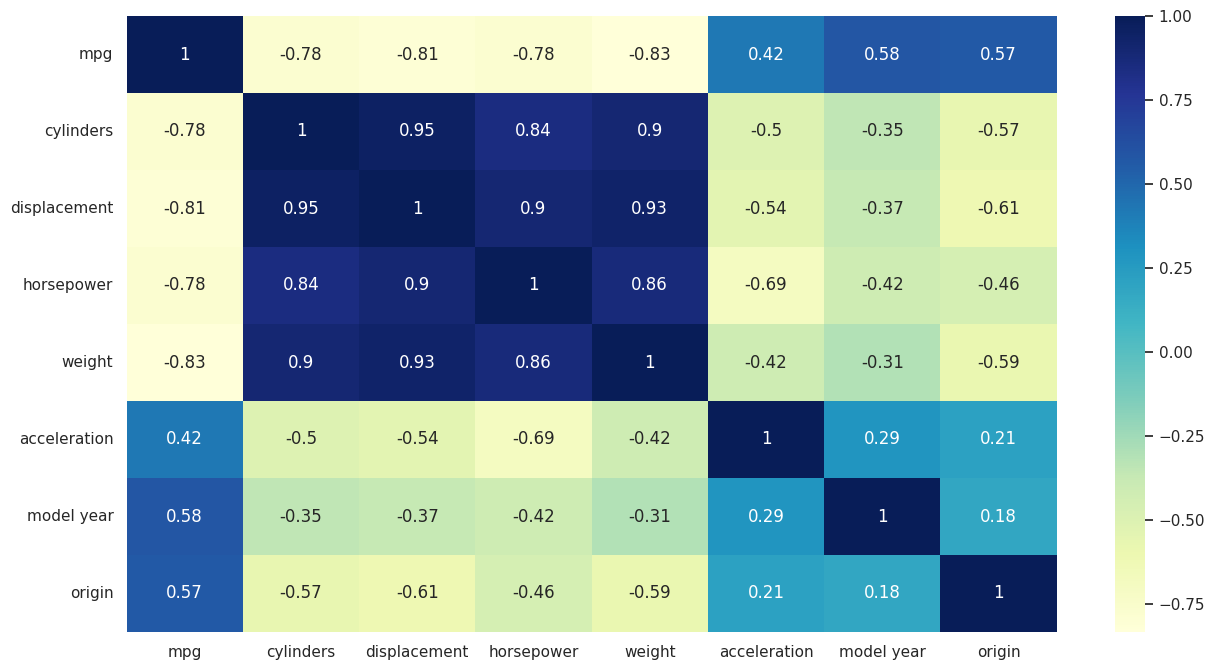

In [ ]:
import seaborn as sb
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos.corr(), annot=True, cmap='YlGnBu' )

In [ ]:
datos['horsepower-weight'] = datos['horsepower'] / datos['weight']

datos

<ipython-input-3635-a92cc09e67e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['horsepower-weight'] = datos['horsepower'] / datos['weight']


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,horsepower-weight
0,18.0,8,307.0,130.0,3504,12.0,70,1,0.037100
1,15.0,8,350.0,165.0,3693,11.5,70,1,0.044679
2,18.0,8,318.0,150.0,3436,11.0,70,1,0.043655
3,16.0,8,304.0,150.0,3433,12.0,70,1,0.043694
4,17.0,8,302.0,140.0,3449,10.5,70,1,0.040591
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0.030824
394,44.0,4,97.0,52.0,2130,24.6,82,2,0.024413
395,32.0,4,135.0,84.0,2295,11.6,82,1,0.036601
396,28.0,4,120.0,79.0,2625,18.6,82,1,0.030095


### **Entrenamiento con Árbol de Decisión**

In [ ]:
# Características de entrada
X = datos.drop(columns=['mpg'], axis=1)

# Etiqueta de salida
y = datos['mpg']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor(
    max_depth=6,
    min_samples_split=9,
    min_samples_leaf=9,
)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=9, min_samples_split=9)

In [ ]:
predicciones = modelo.predict(X_test)

In [ ]:
comparativa = {"Predicciones":predicciones, "Valor Real": y_test}
resultado = pd.DataFrame(comparativa)
resultado

,Predicciones,Valor Real
34,20.356250,16.0
38,14.611111,14.0
183,25.441176,25.0
71,22.416667,19.0
391,31.008333,36.0
...,...,...
388,31.008333,26.0
157,13.535714,15.0
142,29.050000,26.0
179,19.650000,22.0


In [ ]:
modelo.score(X_test, y_test)

0.9061158931512685

In [ ]:
modelo.score(X_train, y_train)

0.8925786290057381

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 1.53060195,  1.09262875,  0.94351135, ..., -0.53649868,
        -0.76563378, -0.8392576 ],
       [-0.83158689, -0.96457503, -1.09057742, ...,  1.34765539,
         1.66784007, -0.82895565],
       [-0.83158689, -0.52995451, -0.2300014 , ...,  0.54016079,
         1.66784007,  0.38052625],
       ...,
       [ 1.53060195,  1.55622397,  1.59546287, ..., -1.61315815,
        -0.76563378,  1.71407944],
       [-0.83158689, -0.66516978, -0.64725038, ...,  1.61682025,
        -0.76563378, -0.85514567],
       [ 0.34950753, -0.1532834 ,  0.29155982, ...,  0.80932565,
        -0.76563378,  1.34649799]])

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predicciones)

mse = np.sqrt(mse)

mse

2.332666121144305

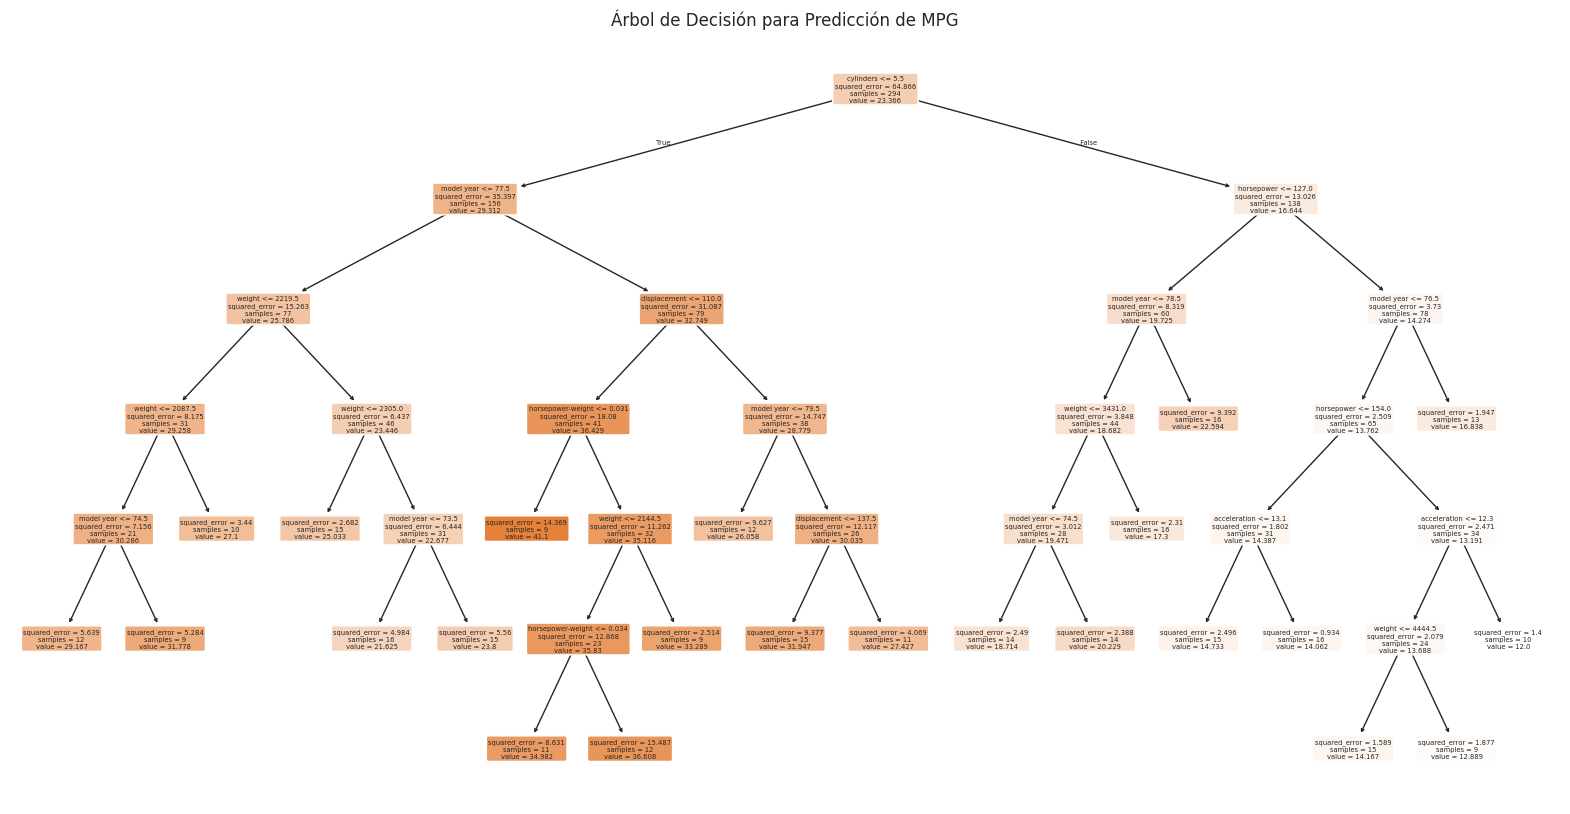

In [ ]:
# Diagrama del Árbol
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(modelo, feature_names=X.columns, filled=True, rounded=True)
plt.title('Árbol de Decisión para Predicción de MPG')
plt.show()

### **Gráfico**

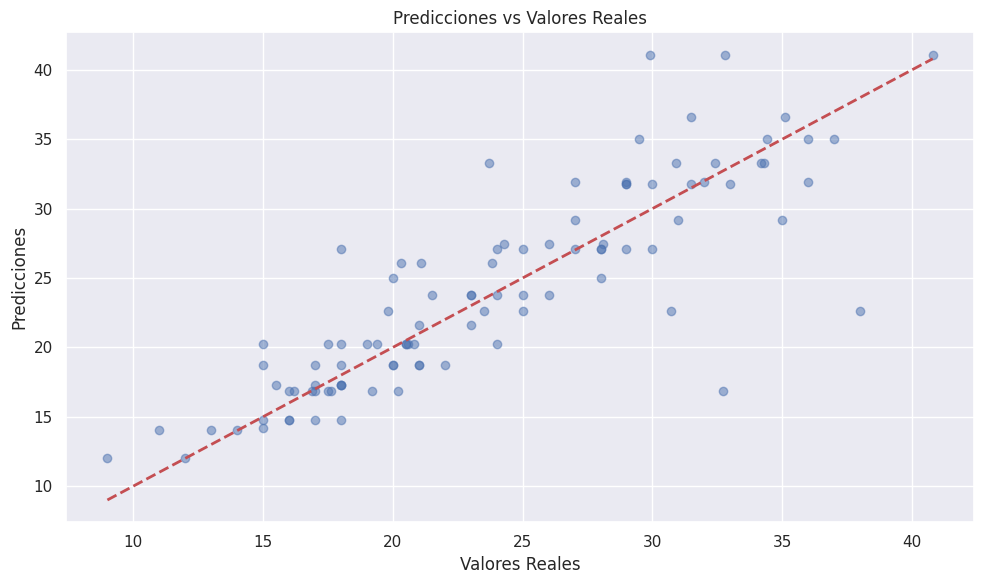

In [ ]:
# Visualización de Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.tight_layout()
plt.show()